# Did you know?... The name *JuPyteR* is a combination of the names of the software languages _Julia_, _Python_, and _R_!

# Sampling Random Variables

In **Part A** of this exercise, we will learn how to draw random samples from common distributions in R, explore randomness, and see quickly how to look at the histogram, boxplot, and kernel density estimate of a sample.

In **Part B**, we will write our own functions to draw random samples from the Pareto (truncated power-law) distribution.

## Part A: Drawing random samples from common distributions in R

There are many distributions available in base R --- this means you don't need to import any packages or modules to use them. 

A common distribution is the normal distribution $N(\mu,\sigma)$, which we will use below.

### The normal distribution

In R, all built-in distributions usually have a variety of functions associated with them. Standard and commonly used distributions (normal, binomial, t, Poisson, etc.) all have functions for calculating the probability density (or mass) function, the cumulative distribution function, and the quantile function. In addition, each built-in distribution also has a function for randomly drawing from this distribution.

In [ ]:
# this is how you look up the help file from R for e.g., the normal distribution's function
?rnorm

If that worked, then you should see a help file below that looks something like this:
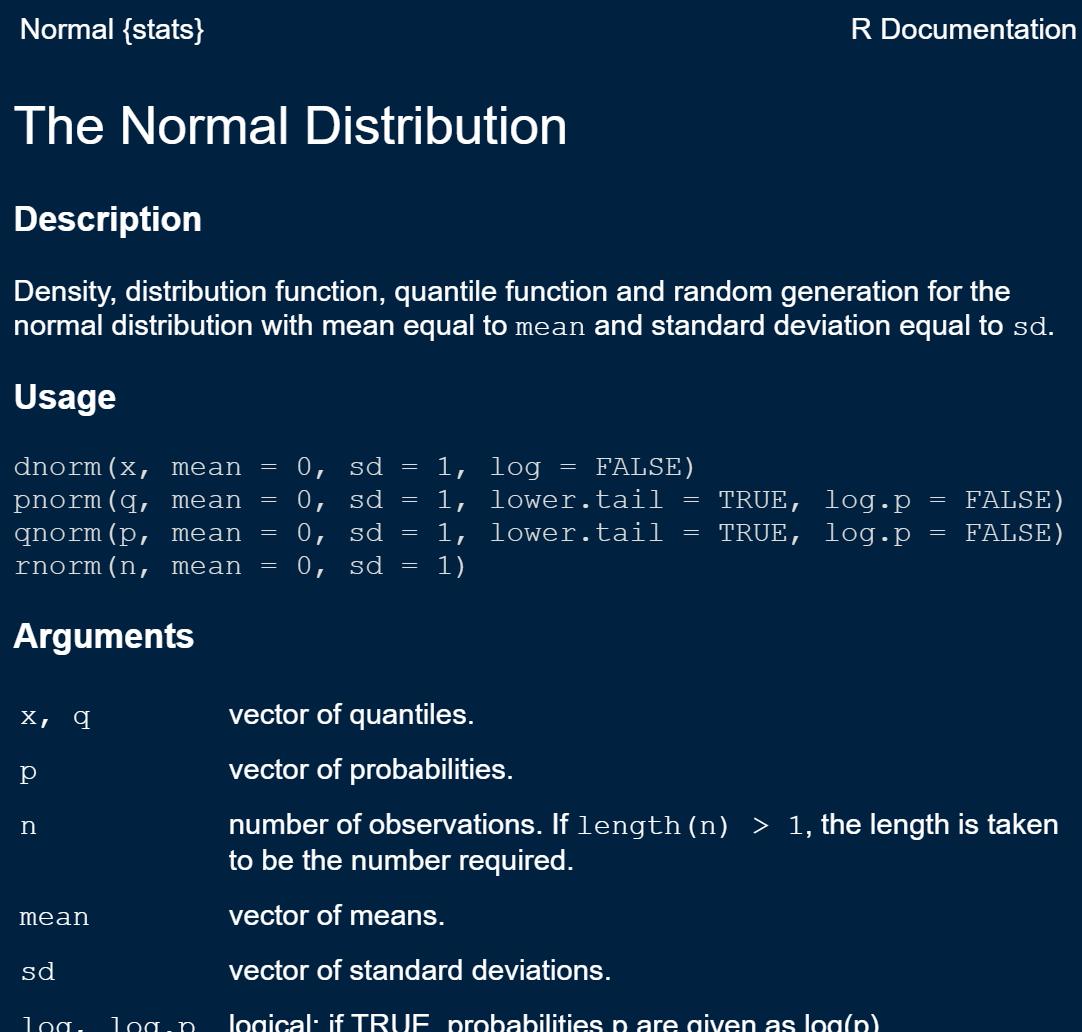
**Fun fact:** All help files in R have the same format, and nearly all have a *working example* at the bottom of the help file.

Let's try using some of these functions.

#### 1. Use the `rnorm` function to draw $n=15$ random samples from the normal distribution, and plot the samples in a histogram. NOTE: you can use tab complete to see the function options and to autocomplete when typing variables.

In [ ]:
# set a mean and standard deviation
mu = 1.7
sigma = 1.1

# number of samples to draw
n = 15

Randomly draw samples, and plot the histogram of these samples. **NOTE:** These samples are _realizations_ $x$ of the random variable $X$ which is distributed as a normal $N(\mu,\sigma)$.

In [ ]:
# randomly draw n samples from the normal with mean mu and standard deviation sigma
x = rnorm(n, mean = mu, sd = sigma)

# make a histogram of the randomly drawn x values
hist(x)

*To get a sense of how randomness can affect our interpretation of the histogram, run the above cell at least ten times to see how much the histogram can change!*
_What happens when $n$ is made to be larger?_

#### 2. Let's visually compare our _empirical distribution_ (i.e. the histogram) to the actual underlying normal distribution. We can do this using the curve function in R.

In [ ]:
# plot the histogram, but in terms of density not counts
# make a histogram of the randomly drawn x values
hist(x, freq = FALSE, ylim=c(0,0.5), xlim=c(-4,8))

curve(dnorm(x, mean = mu, sd = sigma), add=TRUE)

We might also like to look at a boxplot of our sample, or a kernel density estimate. R has some really quick-and-easy base functions for these:

In [ ]:
# make a boxplot showing the empirical distribution of our x values
boxplot(x)

In [ ]:
# plot a simple kernel density estimate of our samples x, and overplot the true normal distribution
plot(density(x), ylim=c(0,0.5))
curve(dnorm(x, mean = mu, sd = sigma), add=TRUE, col="blue")

(NOTE: check our the help file for density to see more options and examples)

#### 3. Next, let's look at the _empirical_ cumulative distribution function of our samples and the true cdf.

In [ ]:
# if you're curious, look up the help file for function ecdf
?ecdf

Plot the ecdf of our samples:

In [ ]:
plot(ecdf(x), verticals = TRUE, pch=NA)

We can also use the `pnorm` function to plot the true cdf given $\mu$ and $\sigma$.

In [ ]:
# plot the cdf of the normal, with mean and variance defined above
curve(pnorm(x, mean=mu, sd=sigma), xlim=c(-4,8), ylab="CDF")

### Extra Practice:

Make similar plots and draw samples from a different distribution. For example, look up `?runif`, `?rbinom`, `?rpois`, etc.

**Check out a list of all distributions available in R with `?Distributions`**

In [ ]:
?Distributions

## Part B: Sampling from a Pareto Distribution

The Pareto distribution has the following probability density function: 
$$ f(x)=\frac{\alpha x_{\mathrm{min}}^{\alpha}}{x^{\alpha+1}} $$ 
where $x_{\mathrm{min}}>0$ and $\alpha>0$ are parameters, and $x\geq x_{\mathrm{min}}$. 

#### 1. Write a function for the *inverse cumulative Pareto distribution function*. Your function should accept a probability $p$ as well as parameters $x_{\mathrm{min}}$ and $\alpha$. Given these inputs, your function should return a value for $x$.

In [ ]:
# The inverse Pareto distribution
invPareto <- function( p, xmin, alpha ){
  # fill in the equation for the inverse cdf here
    
} 

#### 2. Using the function you defined above, generate 100 draws from the Pareto distribution with parameters $x_{\mathrm{min}}=2$ and $\alpha=3$. Make a box plot, histogram, and kde of your sample.

In [ ]:
# Function to generate random draws
rPareto <- function( n, xmin, alpha ){
    # draw a vector of n random uniform numbers between 0 and 1
    
    # pass these to your invPareto
    
}

# Generate 100 draws
x <- rPareto( 100, 2, 3 )

# make a boxplot, histogram, and kde


#### 3. Does the distribution of your 100 draws appear to match the Pareto density?

In [ ]:
# make our own function for the probability density 
dPareto <- function( x, xmin, alpha ){
  # fill in equation for the density here
    
} 

# plot and compare to the true Pareto density (hint: use plot(density()). See below if you get stuck!)



## Solution to part B, for reference

In [ ]:
# The inverse Pareto distribution
invPareto <- function( p, xmin, alpha ){
  xmin/((1-p)^(1/alpha))  
} 

# Function to generate random draws
rPareto <- function( n, xmin, alpha ){
    invPareto( runif(n), xmin, alpha )  
}

# Generate 100 draws
x <- rPareto( 100, 2, 3 )

# make a boxplot, histogram, and kde
boxplot(x)

hist(x)

plot(density(x, from = 2))

In [ ]:
# make our own function for the probability density
dPareto <- function( x, xmin, alpha ){
  (alpha*xmin^alpha)/(x^(alpha+1))  
} 

# Plot and compare to Pareto density
hist( x , xlab = "x", main = "Pareto distribution", freq = FALSE, breaks = 12 )
lines( seq( 2, max(x), 0.01 ), dPareto( seq( 2, max(x), 0.01 ), 2, 3 )
     , col = "blue" )
plot( density( x, from = 2 ), xlab = "x", main = "Pareto distribution" )
lines( seq( 2, max(x), 0.01 ), dPareto( seq( 2, max(x), 0.01 ), 2, 3 )
     , col = "blue" )